In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
ptm_df = pd.read_csv('Data/Conserved_ptms_best_loc.csv')
mod_residues_dic = []
for i in ptm_df.mod_residues_dic:
    d = ast.literal_eval(i)
    mod_residues_dic.append(d)
ptm_df.mod_residues_dic = mod_residues_dic
num_species = []
for index, row in ptm_df.iterrows():
    d = row['mod_residues_dic']
    species = 0
    for key in d:
        if len(d[key][0]) > species:
            species = len(d[key][0])
    num_species.append(species)
ptm_df['num_species'] = num_species
ptm_df

,Unnamed: 0,Gene,Modification,mod_residues_dic,num_species
0,0,accB,Ammonium,"{187: [{'Citrobacter_freundii', 'Chryseobacter...",2
1,1,ackA,Carbamyl,"{403: [{'Citrobacter_freundii', 'Cellvibrio_gi...",2
2,2,acnA,Carbamyl,"{522: [{'Sulfobacillus_thermosulfidooxidans', ...",2
3,3,acpP,Carbamyl,"{94: [{'Delftia_acidovorans', 'Rhodopseudomona...",3
4,4,acpP,Acetyl:13C(2),"{155: [{'Delftia_acidovorans', 'Stigmatella_au...",3
...,...,...,...,...,...
742,742,tyrS,Methyl,"{392: [{'Rhodopseudomonas_palustris', 'Cupriav...",2
743,743,valS,Ammonium,"{1159: [{'Coprococcus_comes', 'Bacillus_subtil...",2
744,744,valS,Methyl:2H(3),"{1159: [{'Coprococcus_comes', 'Bacillus_subtil...",2
745,745,ychF,Ammonia-loss,"{263: [{'Cellulophaga_baltica', 'Bacillus_subt...",2


In [24]:
ptm_df = ptm_df.sort_values('num_species', ascending = False)
ptm_df

,Unnamed: 0,Gene,Modification,mod_residues_dic,num_species
221,221,prfB,Methyl,"{273: [{'Rhodopseudomonas_palustris', 'Cupriav...",13
685,685,tuf,Ammonium,"{38: [{'Delftia_acidovorans', 'Cellulophaga_ba...",10
343,343,rplL,Carbamyl,"{8: [{'Cellvibrio_gilvus', 'Mycobacterium_smeg...",10
218,218,prfA,Methyl,"{244: [{'Citrobacter_freundii', 'Rhizobium_rad...",9
690,690,tuf,Methyl:2H(3)13C(1),"{105: [{'Stigmatella_aurantiaca', 'Rhodopseudo...",8
...,...,...,...,...,...
277,277,rplD,Cation:Na,"{162: [{'Delftia_acidovorans', 'Cupriavidus_ne...",2
278,278,rplD,glyoxalAGE,"{162: [{'Delftia_acidovorans', 'Cupriavidus_ne...",2
279,279,rplD,Cation:Fe[III],"{159: [{'Delftia_acidovorans', 'Paracoccus_den...",2
280,280,rplD,Carbamyl,"{4: [{'Delftia_acidovorans', 'Chryseobacterium...",2


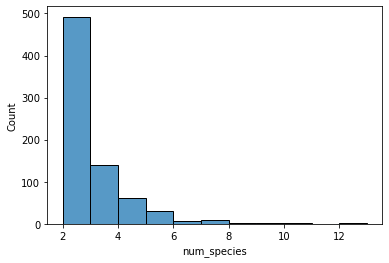

In [6]:
# histogram of 
g = sns.histplot(data = ptm_df, x = 'num_species', binwidth=1)

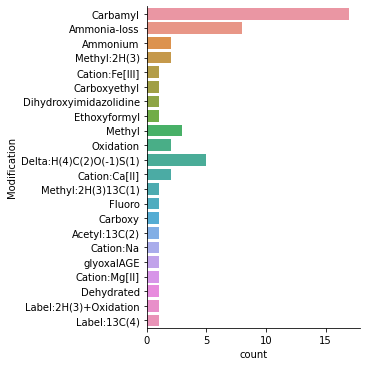

In [8]:
g = sns.catplot(data = ptm_df[ptm_df.num_species >= 5], y = 'Modification', kind = 'count')

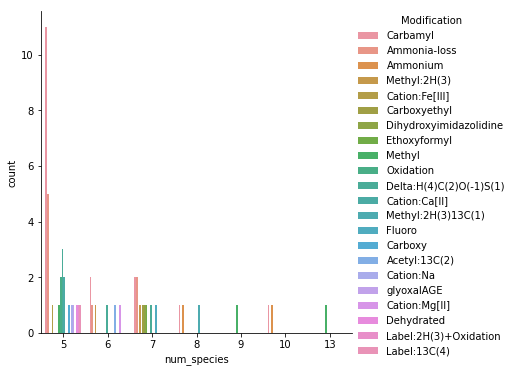

In [20]:
g = sns.catplot(data = ptm_df[ptm_df.num_species >= 5], x = 'num_species', kind = 'count', hue = 'Modification')

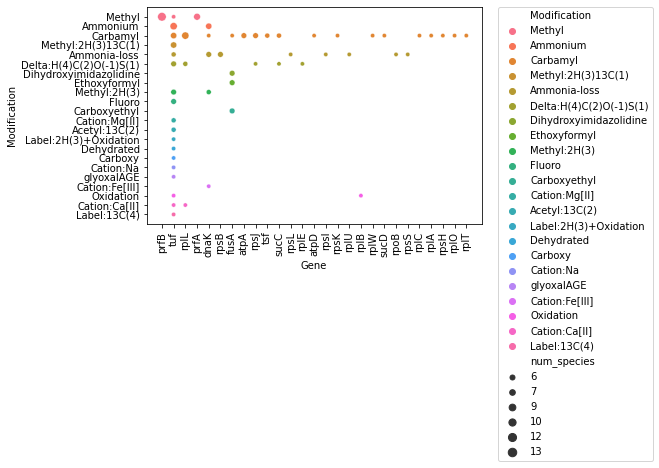

In [81]:
g = sns.scatterplot(data = ptm_df[ptm_df.num_species >= 5], x = 'Gene', y = 'Modification', size = 'num_species', hue = 'Modification')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [83]:
ptm_count_df = pd.DataFrame(ptm_df.groupby('Modification').size().reset_index())
ptm_count_df.columns = ['Modification', 'Count']
ptm_count_df = ptm_count_df.sort_values('Count', ascending = False)
ptm_count_df

,Modification,Count
9,Carbamyl,80
6,Ammonia-loss,58
27,Delta:H(4)C(2)O(-1)S(1),53
2,Acetyl:13C(2),50
7,Ammonium,39
...,...,...
25,Delta:H(2)C(2),1
24,Delta:H(-4)O(3),1
13,Carboxyethyl,1
4,Acetylhypusine,1


In [84]:
for modification in ptm_count_df.Modification:
    print(modification)

Carbamyl
Ammonia-loss
Delta:H(4)C(2)O(-1)S(1)
Acetyl:13C(2)
Ammonium
Cation:Na
glyoxalAGE
Oxidation
Methyl:2H(3)
Cation:Ca[II]
Cation:Mg[II]
Methyl
Cation:Fe[III]
Methyl:2H(3)13C(1)
Ethanolyl
Cation:Fe[II]
Carboxy
Dehydrated
Carbonyl
Cation:Ni[II]
Cation:K
Dioxidation
Label:13C(2)15N(2)
Chlorination
Label:18O(2)
Label:13C(3)15N(1)
Amino
Hydroxamic_acid
Ethyl
Label:13C(1)2H(3)
Dimethyl
Delta:H(4)C(2)
Label:15N(4)
TMAB
Label:2H(4)
Formyl
GIST-Quat:2H(3)
Homocysteic_acid
NEM:2H(5)
15N-oxobutanoic
Xlink:DSS[259]
Acetyl:2H(3)
Carboxy->Thiocarboxy
Deoxy
Propyl
methylol
Carbamidomethyl
Label:2H(3)+Oxidation
Cation:Al[III]
Methyl:2H(2)
Label:13C(4)+Oxidation
Label:13C(4)
Trimethyl
Label:13C(1)2H(3)+Oxidation
Thiazolidine
Hydroxymethyl
Fluoro
PhosphoHex
Nitrosyl
ethylamino
NQIGG
Propionamide
HN3_mustard
Label:2H(9)13C(6)15N(2)
Label:2H(4)13C(1)
Label:18O(1)
Label:15N(1)
Label:13C(5)
Label:13C(4)15N(1)
HNE
2-monomethylsuccinyl
Ethoxyformyl
Dihydroxyimidazolidine
Delta:O(4)
Delta:H(2)C(2)
Delta:H

In [69]:
rows = []
for gene in pd.unique(ptm_df.Gene):
    df = ptm_df[ptm_df.Gene == gene]
    d = {}
    d['gene'] = gene
    d['modifications'] = list(df.Modification)
    d['num_modifications'] = len(df)
    rows.append(d)
gene_modifications = pd.DataFrame(rows)
gene_modifications.sort_values('num_modifications', ascending = False)          

,gene,modifications,num_modifications
1,tuf,"[Ammonium, Methyl:2H(3)13C(1), Carbamyl, Delta...",57
2,rplL,"[Carbamyl, Delta:H(4)C(2)O(-1)S(1), Cation:Ca[...",35
6,fusA,"[Dihydroxyimidazolidine, Ethoxyformyl, Carboxy...",30
13,atpD,"[Carbamyl, Methyl:2H(3), Methyl:2H(3)13C(1), A...",27
4,dnaK,"[Ammonium, Ammonia-loss, Methyl:2H(3), Cation:...",22
...,...,...,...
98,acnA,[Carbamyl],1
82,infB,[Cation:Ni[II]],1
95,aspS,[Ammonia-loss],1
87,fumC,[Cation:Fe[II]],1


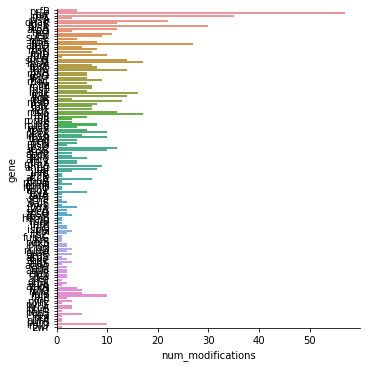

In [70]:
sns.catplot(data = gene_modifications, x = 'num_modifications', y = 'gene', kind = 'bar')

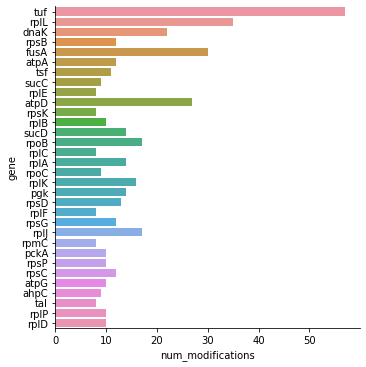

In [71]:
sns.catplot(data = gene_modifications[gene_modifications.num_modifications >= 8] , x = 'num_modifications', y = 'gene', kind = 'bar')